In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ice = pd.read_csv('./icecream__utf8.csv')
df_ice

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<AxesSubplot:>

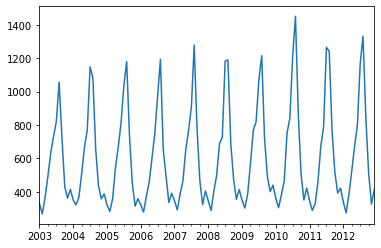

In [3]:
# 月毎に仮定の平均消費額の読み出し
# インデックスは2003-1から月毎
y = pd.Series(df_ice.アイスクリーム.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [4]:
from statsmodels.tsa import stattools

# トレンド項あり（2次まで）、定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり（1次）、定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")

print("ctt: ")
print(ctt)
print("ct: ")
print(ct)
print("c: ")
print(c)
print("nc: ")
print(nc)

ctt: 
(-3.3089558508822066, 0.1692244861968651, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct: 
(-1.714560199971079, 0.7444294601457553, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c: 
(-0.6539247687694224, 0.8583259363632658, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc: 
(1.6310949179759076, 0.9751761218376866, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


<AxesSubplot:>

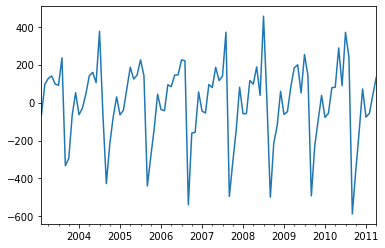

In [5]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [6]:
from statsmodels.tsa import stattools

# トレンド項あり（2次まで）、定数項ありの場合
ctt = stattools.adfuller(y_diff, regression="ctt")
# トレンド項あり（1次）、定数項ありの場合
ct = stattools.adfuller(y_diff, regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y_diff, regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y_diff, regression="nc")

print("ctt: ")
print(ctt)
print("ct: ")
print(ct)
print("c: ")
print(c)
print("nc: ")
print(nc)

ctt: 
(-20.49413879057406, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214956)
ct: 
(-20.51282538674093, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902557)
c: 
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415186)
nc: 
(-20.337724459102372, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068397)


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [47]:
from statsmodels.tsa import ar_model

for i in range(20):
    model = ar_model.AutoReg(y_diff,lags=i+1)
    results = model.fit()
    print(results.aic)

1319.2002363463098
1304.0197864939166
1293.0884574632883
1281.7253591677493
1266.8283707583764
1240.2184395374745
1227.236081706349
1199.8618885960686
1168.5285182810348
1102.2890529620913
1014.3206848715979
1006.0719822391264
996.4783471223761
988.1539665706359
979.444884976763
971.0582271698917
962.564194219886
935.5999156962922
926.7391631562662
916.7418813228519
